<a href="https://colab.research.google.com/github/ParthDhabalia1024/sample/blob/main/Codsoft_Task_2_(Creditcard_fraud_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
test_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
372176,368302,2020-11-10 21:42:39,4988304376504,fraud_Friesen-Ortiz,personal_care,45.72,William,Thompson,M,977 Rita Grove Apt. 000,...,41.4575,-74.1659,2258.0,Building surveyor,1937-03-17,7bbf5afc25e94a603e2998a7cab21d84,1.384120e+09,42.352432,-74.094504,0.0
372177,368303,2020-11-10 21:42:57,376445266762684,fraud_Osinski Inc,personal_care,1.39,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789.0,Insurance broker,1982-02-11,943b8b705df806bc5d3ea842d9e6e263,1.384120e+09,40.280851,-101.976917,0.0
372178,368304,2020-11-10 21:42:57,377654590313960,fraud_Waelchi Inc,kids_pets,99.50,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,...,36.0435,-84.0400,25459.0,"Teacher, special educational needs",1969-02-22,984ff6b7db2ca5bc4318f7c1e112c4df,1.384120e+09,36.453749,-84.279168,0.0
372179,368305,2020-11-10 21:43:40,6538441737335434,fraud_Runte-Mohr,food_dining,8.43,Gina,Grimes,F,444 Robert Mews,...,41.3851,-80.1752,606.0,Energy manager,1997-09-22,d2d0431aa41d247bfc5372ba233aed2a,1.384120e+09,42.176536,-80.141904,0.0
372180,368306,2020-11-10 21:43:42,4119762878330989,"fraud_Durgan, Gislason and Spencer",home,7.17,Melinda,Gutierrez,F,1497 West Gateway,...,40.7152,-89.2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                      True
state                     True
zip                       True
lat                       True
long                      True
city_pop                  True
job                       True
dob                       True
trans_num                 True
unix_time                 True
merch_lat                 True
merch_long                True
is_fraud                  True
dtype: bool

In [ ]:
train_data['is_fraud'].value_counts()

0.0    847601
1.0      4882
Name: is_fraud, dtype: int64

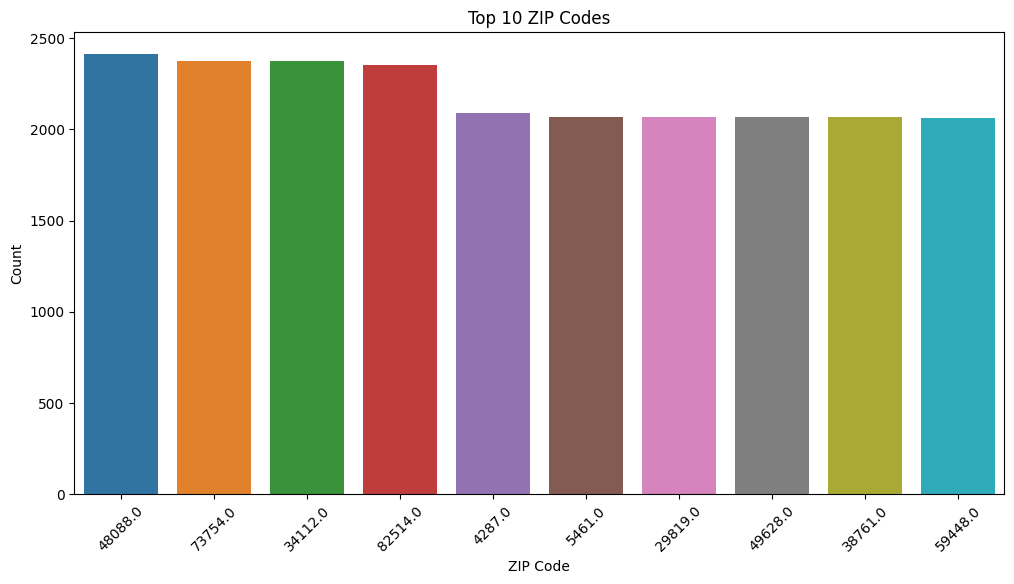

In [ ]:
top_zip_codes = train_data['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_data[train_data['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

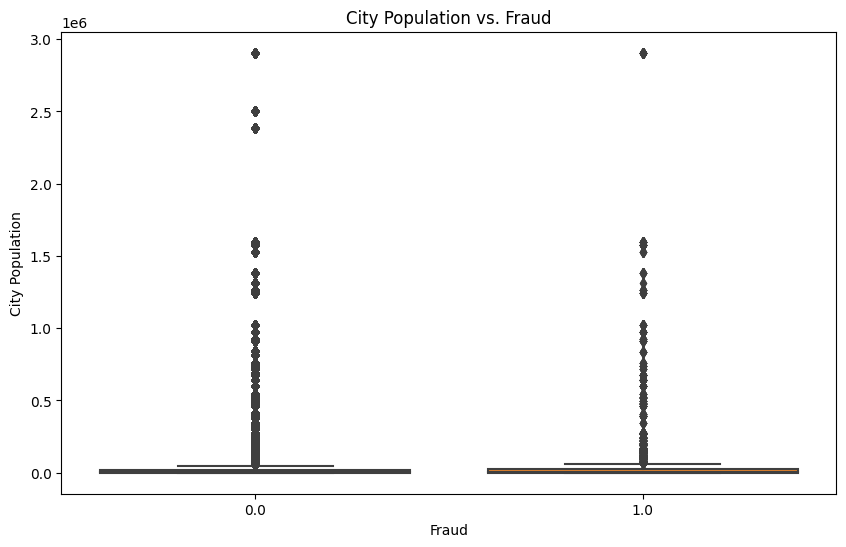

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train_data)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()

<ipython-input-55-1ed84e2e0a3e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [ ]:
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)

In [ ]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_data[features]
y = train_data['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(681987, 681987, 170497, 170497)

In [ ]:
X_train.shape

(681987, 8)

In [ ]:
y_train.shape

(681987,)

In [ ]:
y_test.shape

(170497,)

In [ ]:
X_test.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
174243,108.56,63867.0,36.7154,-89.6287,1019.0,1.333270e+09,36.575042,-88.874223
768229,8.60,94558.0,38.4549,-122.2564,94014.0,1.353798e+09,38.188362,-122.718169
620652,57.96,6024.0,42.0158,-73.2913,647.0,1.348223e+09,42.222568,-73.543211
350826,24.29,40820.0,36.7558,-83.1838,581.0,1.339626e+09,37.117965,-83.098699
23306,65.56,28611.0,35.9946,-81.7266,885.0,1.326562e+09,35.478790,-82.722932


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:

print(f'Model: {name}')
print(f'Accuracy: {metrics["Accuracy"]:.4f}')
print(f'Precision: {metrics["Precision"]:.4f}')
print(f'Recall: {metrics["Recall"]:.4f}')
print(f'F1 Score: {metrics["F1 Score"]:.4f}')
print(f'Confusion Matrix:')
print(metrics['Confusion Matrix'])
print('='*40)

Model: Random Forest
Accuracy: 0.9963
Precision: 0.8686
Recall: 0.4501
F1 Score: 0.5930
Confusion Matrix:
[[169415     69]
 [   557    456]]


Model: Random Forest
Accuracy: 0.9963
Precision: 0.8686
Recall: 0.4501
F1 Score: 0.5930
Confusion Matrix:
[[169415     69]
 [   557    456]]
